<b>In this practical exam you are required to do the following:</b><b>
1. Implement the Adam (Batch Version) algorithm to train a multivariable linear regression model.
2. Update your implementation to work for mini-batch.
</b>

### Please fulfil the following requirements:
<br>
<b>
    
    1. Each implementation must be in a sepearate function. i.e. two separate functions.
    2. Check each function on the data in the attached file.
    3. You must obtain r2-score > 0.9 using each functiion.
    4. You must plot the following curves.
        - Loss vs. iterations.
        - Loss vs. each parameter (i.e. loss vs theta 0, loss vs. theta 1 .... etc.).
    5. Choose hyper parameters to obtain the required accuracy.
    6. The implementation must be vectoried and calculations must be performed as matrix vector multiplications.
    7. Apply the stop conditions (gradient < 0.001 and cost convergence check).                                            
</b>
    
<b><i>Note: You are allowed to use the code you developed during practical sessions. However, it should be your own code.</i></b>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
data = np.genfromtxt('MultipleLR.csv', dtype=float, delimiter=',')
data

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [3]:
X = data[:,:-1]
X

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.],
       [ 53.,  46.,  55.],
       [ 69.,  74.,  77.],
       [ 47.,  56.,  60.],
       [ 87.,  79.,  90.],
       [ 79.,  70.,  88.],
       [ 69.,  70.,  73.],
       [ 70.,  65.,  74.],
       [ 93.,  95.,  91.],
       [ 79.,  80.,  73.],
       [ 70.,  73.,  78.],
       [ 93.,  89.,  96.],
       [ 78.,  75.,  68.],
       [ 81.,  90.,  93.],
       [ 88.,  92.,  86.],
       [ 78.,  83.,  77.],
       [ 82.,  86.,  90.],
       [ 86.,  82.,  89.],
       [ 78.,  83.,  85.],
       [ 76.,  83.,  71.],
       [ 96.,  93.,  95.]])

In [4]:
Y = data[:,[-1]]
Y

array([[152.],
       [185.],
       [180.],
       [196.],
       [142.],
       [101.],
       [149.],
       [115.],
       [175.],
       [164.],
       [141.],
       [141.],
       [184.],
       [152.],
       [148.],
       [192.],
       [147.],
       [183.],
       [177.],
       [159.],
       [177.],
       [175.],
       [175.],
       [149.],
       [192.]])

In [5]:
X = np.insert(X,0,np.ones(len(X)), axis=1)

In [6]:
X

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

In [10]:
def calCost(X,y,theta):
  z = np.power(((X @ theta) - y), 2)
  
  return np.sum(z) / (2*len(X))

## Multivariate Adam Batch

In [76]:
m = len(X)
n = X.shape[1]

theta = np.ones((n,1))

costs=[]
preds=[]
thetas=[]
cost_iter = []
thetas_iter = []

#alpha = 0.0002
epochs = 100
iters = 1000

def ADAM_Batch_GD(X, Y, theta, alpha, beta1, beta2, eps, iters, VT, mt):
  for i in range(iters):
    
    #predict  
    h = X @ theta
    preds.append(h)

    #error
    error = h - Y

    #calculate cost
    J = (error.T @ error)/(2*m)
    costs.append(J[0,0])

    #calculate gradients
    grad = (X.T @ error)/m
    
    #VT and mt and theta
    mt = (beta1 * mt) + (1-beta1) * grad
    VT = (beta2 * VT) + (1-beta2) * np.power(grad,2)
    
    #mt hat and VT hat for bias correction
    mt_hat = mt/(1-np.power(beta1,i+1))
    vt_hat = VT/(1-np.power(beta2,i+1))
    
    #Update thetas
    theta = theta - ((alpha * mt_hat)/((np.sqrt(vt_hat))+ eps))

    thetas.append(theta)

    if i>0:
      if(np.abs(costs[i-1] - costs[i]) < 0.001):
        break
      if (np.linalg.norm(grad) < 0.001):
        break
    
  return theta, costs, preds, thetas

In [77]:
beta1 = 0.5
beta2 = 0.4
alpha = 0.005
eps = 0.01
VT = np.zeros((n,1))
mt = np.zeros((n,1))

In [78]:
theta, costs, preds, thetas = ADAM_Batch_GD(X, Y, theta, alpha, beta1, beta2, eps, iters, VT, mt)

In [79]:
costs[-1]

4.6928619097652895

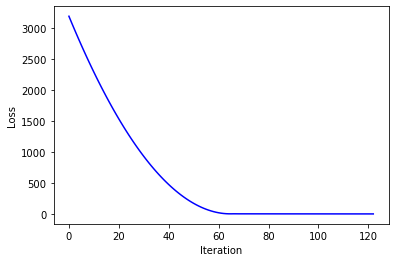

In [80]:
#Plot epochs against Loss
plt.plot(costs, 'b')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [81]:
np.array(thetas).shape

(123, 4, 1)

In [82]:
thetas_plot = np.array(thetas).reshape(-1,n)
thetas_plot

array([[0.99500063, 0.99500001, 0.99500001, 0.99500001],
       [0.98999772, 0.98999646, 0.98999646, 0.98999646],
       [0.98499006, 0.98498816, 0.98498816, 0.98498814],
       [0.97997752, 0.97997498, 0.97997498, 0.97997493],
       [0.97496071, 0.97495751, 0.97495751, 0.97495742],
       [0.9699405 , 0.96993663, 0.96993664, 0.96993651],
       [0.96491777, 0.96491322, 0.96491323, 0.96491304],
       [0.95989319, 0.95988795, 0.95988796, 0.95988772],
       [0.95486726, 0.95486133, 0.95486134, 0.95486104],
       [0.94984032, 0.94983368, 0.9498337 , 0.94983333],
       [0.94481257, 0.9448052 , 0.94480522, 0.94480479],
       [0.93978413, 0.93977602, 0.93977604, 0.93977554],
       [0.93475505, 0.93474619, 0.93474622, 0.93474565],
       [0.92972538, 0.92971575, 0.92971578, 0.92971513],
       [0.92469511, 0.9246847 , 0.92468474, 0.92468401],
       [0.91966424, 0.91965304, 0.91965308, 0.91965227],
       [0.91463276, 0.91462075, 0.91462079, 0.9146199 ],
       [0.90960065, 0.90958781,

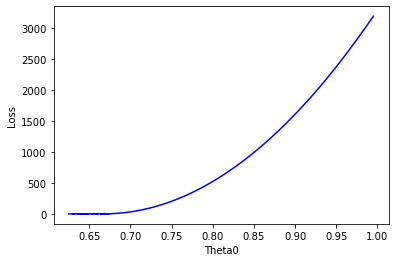

In [83]:
plt.plot(thetas_plot[:,0],costs,'b')
plt.xlabel('Theta0')
plt.ylabel('Loss')
plt.show()

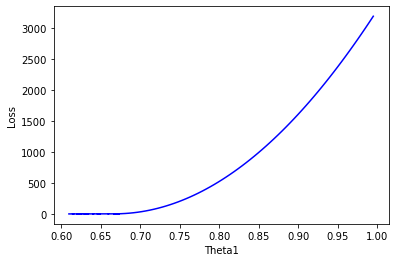

In [84]:
plt.plot(thetas_plot[:,1],costs,'b')
plt.xlabel('Theta1')
plt.ylabel('Loss')
plt.show()

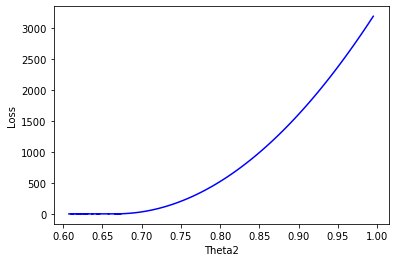

In [85]:
plt.plot(thetas_plot[:,2],costs,'b')
plt.xlabel('Theta2')
plt.ylabel('Loss')
plt.show()

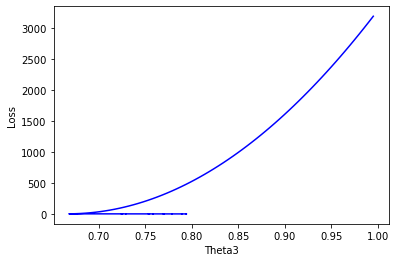

In [86]:
plt.plot(thetas_plot[:,3],costs,'b')
plt.xlabel('Theta3')
plt.ylabel('Loss')
plt.show()

In [87]:
h_hat_b = X @ theta
h_hat_b

array([[153.28493135],
       [184.63403031],
       [181.63415819],
       [198.09564022],
       [140.81195686],
       [104.55859777],
       [148.79112044],
       [110.94431632],
       [173.12766382],
       [161.19616316],
       [143.18499196],
       [141.55268607],
       [187.29627997],
       [155.35460885],
       [149.58784295],
       [187.62411247],
       [147.73724367],
       [178.53208943],
       [178.45461062],
       [159.74377564],
       [174.32994056],
       [173.5454555 ],
       [166.0979758 ],
       [153.75871634],
       [191.08797962]])

In [88]:
from sklearn import metrics
metrics.r2_score(Y,h_hat_b)

0.9830779559081188

## Multivariate Adam MiniBatch

In [90]:
m = len(X)
n = X.shape[1]

theta = np.ones((n,1))

costs=[]
preds=[]
thetas=[]
cost_iter = []
thetas_iter = []

#alpha = 0.0002
epochs = 100

def Adam_minibatch_GD(X,Y, theta, alpha, iters, batch_size, beta1, beta2, eps, VT, mt):
  m = len(X)
  cost_hist = []
  num_batch = int(m/batch_size)
  
  for i in range(iters):
    cst = 0.0
    
    idxs = np.random.permutation(m)
    X = X[idxs]
    Y = Y[idxs]
    
    for j in range(0,m,batch_size):
      x_i = X[j:j+batch_size]
      y_i = Y[j:j+batch_size]
       
      #hypothesis
      h = x_i @ theta
      preds.append(h)
      #error
      error = h - y_i
      #gradient
      grad = (x_i.T @ error)/len(x_i)
      
      mt = (beta1 * mt) + (1-beta1) * grad
      VT = (beta2 * VT) + (1-beta2) * np.power(grad,2)
    
      #mt hat and VT hat for bias correction
      mt_hat = mt/(1-np.power(beta1,i+1))
      vt_hat = VT/(1-np.power(beta2,i+1))
    
      #Update thetas
      theta = theta - ((alpha * mt_hat)/((np.sqrt(vt_hat))+ eps))
      
      #append cost
      cost_iter.append(calCost(x_i,y_i,theta))
      #append Theta
      thetas_iter.append(theta)
      
    #append
    cost_hist.append(calCost(X,Y,theta))
    thetas.append(theta)       
    preds.append(h)  
    #stopping condition
    if i>0:
      if(np.abs(cost_hist[-2] - cost_hist[-1]) < 0.01):
        break
      if (np.linalg.norm(grad) < 0.001):
        break
        
  return theta, cost_hist, cost_iter, preds, thetas, thetas_iter

In [91]:
beta1 = 0.5
beta2 = 0.4
alpha = 0.005
eps = 0.01
VT = np.zeros((n,1))
mt = np.zeros((n,1))

In [92]:
theta_opt, cost_hist, cost_it, hs, thetas, thetas_it = Adam_minibatch_GD(X, Y, theta, alpha, 1000, 5, beta1, beta2, eps, VT, mt)

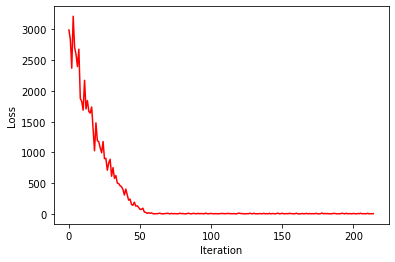

In [93]:
#Plot epochs against Loss
plt.plot(cost_it, 'r')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [94]:
cost_hist[-1]

5.621473371632544

In [95]:
thetas_plot = np.array(thetas_it).reshape(-1,n)
thetas_plot

array([[0.99500065, 0.99500001, 0.99500001, 0.99500001],
       [0.98866292, 0.98864685, 0.98864719, 0.98863215],
       [0.98161879, 0.98159299, 0.98156932, 0.98156915],
       [0.97433398, 0.97444056, 0.97442291, 0.97443972],
       [0.96679887, 0.96695375, 0.96693473, 0.96697665],
       [0.96075371, 0.9609137 , 0.96090502, 0.96093417],
       [0.95464518, 0.95479358, 0.9548049 , 0.95482132],
       [0.94855604, 0.94873305, 0.94875206, 0.9487257 ],
       [0.94237386, 0.94254474, 0.94255657, 0.94252508],
       [0.93617774, 0.93634545, 0.93634871, 0.93636381],
       [0.93057218, 0.93069952, 0.93070766, 0.93074541],
       [0.92505625, 0.92524952, 0.92527573, 0.92526281],
       [0.91949765, 0.91970504, 0.91972867, 0.91969127],
       [0.91395937, 0.91421888, 0.91424231, 0.91422848],
       [0.908405  , 0.90865968, 0.9086934 , 0.90865576],
       [0.90311493, 0.90340606, 0.90343287, 0.90342379],
       [0.89784411, 0.89815618, 0.89818293, 0.89817466],
       [0.89252819, 0.89281515,

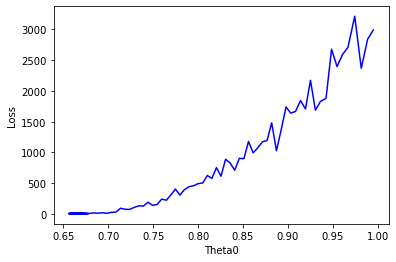

In [96]:
plt.plot(thetas_plot[:,0],cost_iter, 'b')
plt.xlabel('Theta0')
plt.ylabel('Loss')
plt.show()

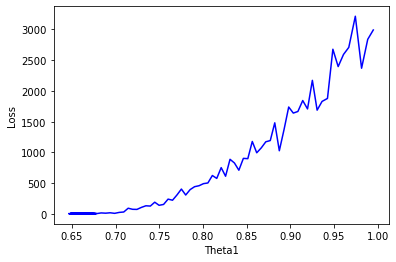

In [97]:
plt.plot(thetas_plot[:,1],cost_iter, 'b')
plt.xlabel('Theta1')
plt.ylabel('Loss')
plt.show()

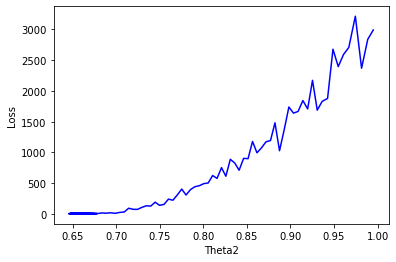

In [98]:
plt.plot(thetas_plot[:,2],cost_iter, 'b')
plt.xlabel('Theta2')
plt.ylabel('Loss')
plt.show()

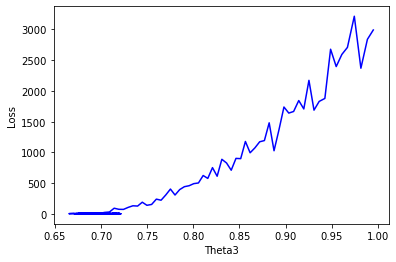

In [100]:
plt.plot(thetas_plot[:,3],cost_iter, 'b')
plt.xlabel('Theta3')
plt.ylabel('Loss')
plt.show()

In [101]:
h_hat = X @ theta_opt
h_hat

array([[153.29587486],
       [184.29910876],
       [181.49962218],
       [197.71640478],
       [140.66868626],
       [104.06631679],
       [148.2689043 ],
       [110.2311978 ],
       [172.45639613],
       [160.0377642 ],
       [142.81731179],
       [140.95155898],
       [187.38601048],
       [155.74067554],
       [148.98657281],
       [187.09609249],
       [148.27970386],
       [177.83304688],
       [178.63082528],
       [159.89993168],
       [173.74497821],
       [173.03043828],
       [165.63627405],
       [154.3047128 ],
       [190.90191415]])

In [102]:
from sklearn import metrics
metrics.r2_score(Y,h_hat)

0.9797423799000771

### الْحَمْدُ لِلَّهِ حَمْدًا كَثِيرًا طَيِّبًا مُبَارَكًا فِيهِ